# Import

In [1]:
from transformers import pipeline
from pysentimiento import create_analyzer

from wordcloud import WordCloud

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords

2025-02-26 10:07:30.086422: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-26 10:07:30.295831: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740575250.387953   10845 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740575250.419258   10845 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-26 10:07:30.663915: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

# Functions

In [41]:
def word_cloud_plot(df, text_column, sentiment_class, portuguese_stopwords=portuguese_stopwords):
    # Filtrando as resenhas com base no sentimento especificado
    text_sentiment = df.query(f"pred == '{sentiment_class}'")[text_column]

    # Unindo todas as resenhas em uma única string
    text_joined = " ".join(text_sentiment)

    # Dividindo o texto em palavras e filtrando com stopwords
    words = text_joined.split()
    words_filtered = [word for word in words if word not in portuguese_stopwords]
    words_filtered = " ".join(words_filtered)

    # Criando e exibindo a nuvem de palavras
    word_cloud_img = WordCloud(width=800, height=500, max_words=50).generate(words_filtered)
    plt.figure(figsize=(10, 7))
    plt.imshow(word_cloud_img, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Sentiment Analysis

## EN

In [7]:
setment_classification_en = pipeline('sentiment-analysis', 'distilbert-base-uncased-finetuned-sst-2-english')

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [9]:
setment_classification_en('This product is exactly what was described in the store')

[{'label': 'POSITIVE', 'score': 0.8811222314834595}]

In [10]:
setment_classification_en('Good cost benefit')

[{'label': 'POSITIVE', 'score': 0.9998188614845276}]

In [12]:
setment_classification_en('The product broken in two weeks, I don"t recommend')

[{'label': 'NEGATIVE', 'score': 0.9968892931938171}]

In [13]:
setment_classification_en('Above my expectations!')

[{'label': 'POSITIVE', 'score': 0.9996040463447571}]

## PT

In [2]:
setment_analyzer = create_analyzer(task='sentiment', lang='pt')

config.json:   0%|          | 0.00/952 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/799k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [4]:
setment_analyzer.predict('''
Galera, o tênis é bom, leve, custo benefício bom, o solado não é costurado, 
só tem um detalhe que pra mim não deu certo, eu uso n°39 e ficou apertado, 
fiz a devolução e comprei o 40, aí serviu perfeitamente. Meu pé é fino e ainda assim precisei pegar um número maior.
''')

AnalyzerOutput(output=POS, probas={POS: 0.493, NEU: 0.416, NEG: 0.091})

In [5]:
setment_analyzer.predict('Parece ótimo ainda estou aprendendo a usar mais super recomendo perfeito estado novo. Sem nenhuma avaria.')

AnalyzerOutput(output=POS, probas={POS: 0.987, NEU: 0.011, NEG: 0.002})

In [7]:
setment_analyzer.predict('''A valvula de contenção é bem tosca, entao encher é um saco, porque como ela nao contém o ar la dentro, 
voce tira a bomba e ele ja começa a esvaziar muito rapido. Nao indico. Dinheiro jogado fora.''')

AnalyzerOutput(output=NEG, probas={NEG: 0.980, NEU: 0.015, POS: 0.006})

### Review Prediction

In [10]:
df_review = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/hugging_face/refs/heads/main/Dados/resenhas.csv')

In [11]:
df_review.head()

,ID,Resenha
0,24,"A fritadeira é sensacional, muito além do que ..."
1,733,"Após usar o produto, achei-o fácil e muito efi..."
2,865,"Muito funcional, prática e moderna."
3,809,"Boa, mas não das melhores pois a frente de vid..."
4,628,Eu comecei a usar e é bem espaçosa. Gostei poi...


In [13]:
review_pred = setment_analyzer.predict(df_review['Resenha'])

Map:   0%|          | 0/36 [00:00<?, ? examples/s]

### Review Analysis

In [20]:
review_list = list()

for review in review_pred:
    review_list.append(review.output)

In [22]:
df_review['pred'] = review_list

In [26]:
df_review.value_counts('pred')

pred
NEG    19
POS    13
NEU     4
Name: count, dtype: int64

In [27]:
df_review.value_counts('pred', normalize=True)

pred
NEG    0.527778
POS    0.361111
NEU    0.111111
Name: proportion, dtype: float64

In [30]:
nltk.download('stopwords')
portuguese_stopwords = set(stopwords.words('portuguese'))

[nltk_data] Downloading package stopwords to /home/marcos/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
list(portuguese_stopwords)[:5]

['é', 'dos', 'lhes', 'seu', 'ou']

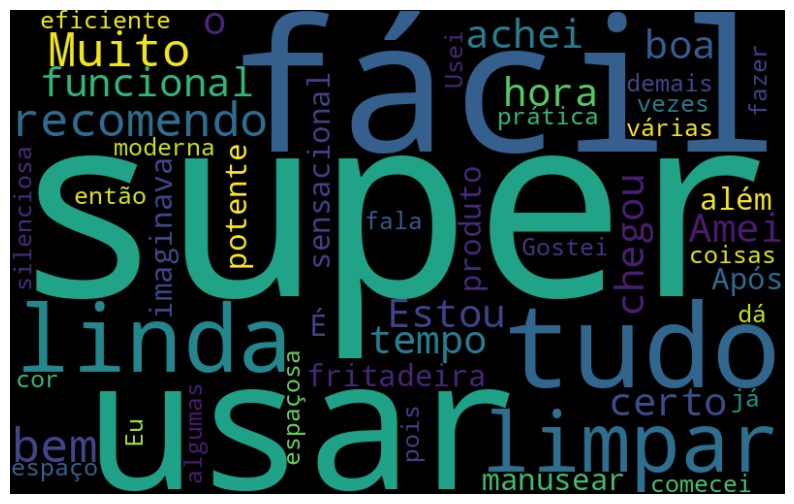

In [42]:
word_cloud_plot(df_review, 'Resenha', 'POS')

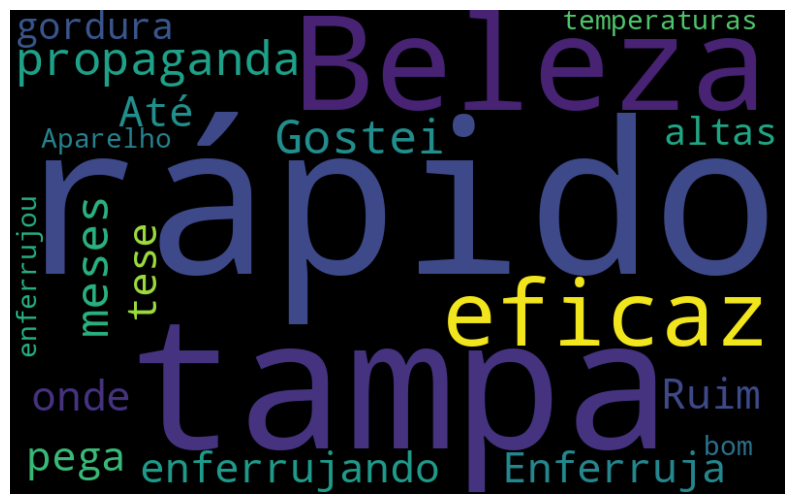

In [44]:
word_cloud_plot(df_review, 'Resenha', 'NEU')

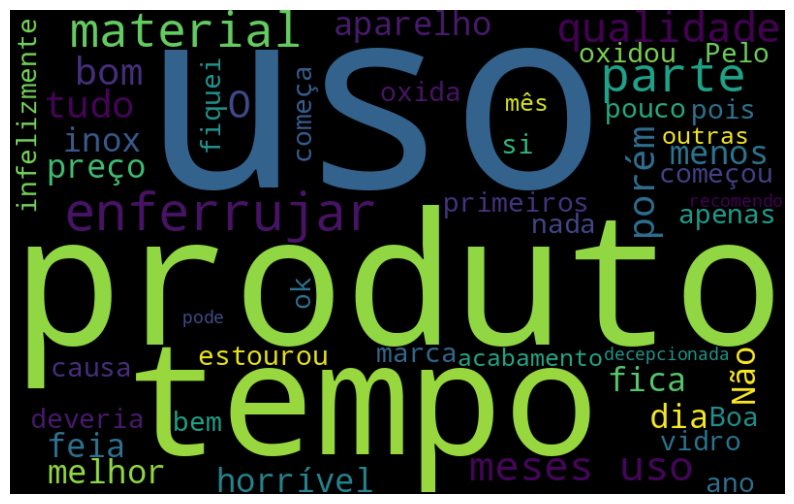

In [45]:
word_cloud_plot(df_review, 'Resenha', 'NEG')

# Text Classification

In [2]:
classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [3]:
target_text = 'The path on the wood was wonderful'
candidate_labels = ['travel', 'cooking', 'hiking']

In [4]:
classifier(target_text, candidate_labels)

{'sequence': 'The path on the wood was wonderful',
 'labels': ['travel', 'hiking', 'cooking'],
 'scores': [0.5279220938682556, 0.4670180082321167, 0.005059841554611921]}

In [5]:
classifier_pt = pipeline('zero-shot-classification', model='MoritzLaurer/mDeBERTa-v3-base-mnli-xnli')
target_text = 'A trilha na floresta foi incrível'
classifier_pt(target_text, candidate_labels, multi_label=False)

config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/286 [00:00<?, ?B/s]

{'sequence': 'A trilha na floresta foi incrível',
 'labels': ['hiking', 'travel', 'cooking'],
 'scores': [0.7931719422340393, 0.20613466203212738, 0.0006934041739441454]}

In [6]:
target_text = 'Next year I will go to Australia'

classifier_pt(target_text, candidate_labels, multi_label=False)

{'sequence': 'Next year I will go to Australia',
 'labels': ['travel', 'hiking', 'cooking'],
 'scores': [0.9409104585647583, 0.038797032088041306, 0.02029249258339405]}